# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5 # 5 increase n 
label_name = "stat1"
layers = [2] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.398684024810791
Epoch 1, Loss 1.379128336906433
Epoch 2, Loss 1.37325519323349
Epoch 3, Loss 1.3949925303459167
Epoch 4, Loss 1.3676090836524963
Epoch 5, Loss 1.3673871755599976
Epoch 6, Loss 1.389101505279541
Epoch 7, Loss 1.3599315881729126
Epoch 8, Loss 1.3277718424797058
Epoch 9, Loss 1.3542797565460205
Epoch 10, Loss 1.3447079062461853
Epoch 11, Loss 1.3441078066825867
Epoch 12, Loss 1.3166507482528687
Epoch 13, Loss 1.3258982300758362
Epoch 14, Loss 1.3139628767967224
Epoch 15, Loss 1.2991454005241394
Epoch 16, Loss 1.299607753753662
Epoch 17, Loss 1.2776108384132385
Epoch 18, Loss 1.2788901925086975
Epoch 19, Loss 1.282235562801361
Epoch 20, Loss 1.2654684782028198
Epoch 21, Loss 1.263957917690277
Epoch 22, Loss 1.2493169903755188
Epoch 23, Loss 1.2434988617897034
Epoch 24, Loss 1.241481065750122
Epoch 25, Loss 1.2327246069908142
Epoch 26, Loss 1.2464176416397095
Epoch 27, Loss 1.2311091423034668
Epoch 28, Loss 1.2160999774932861
Epoch 29, Loss 1.1914103031158447

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

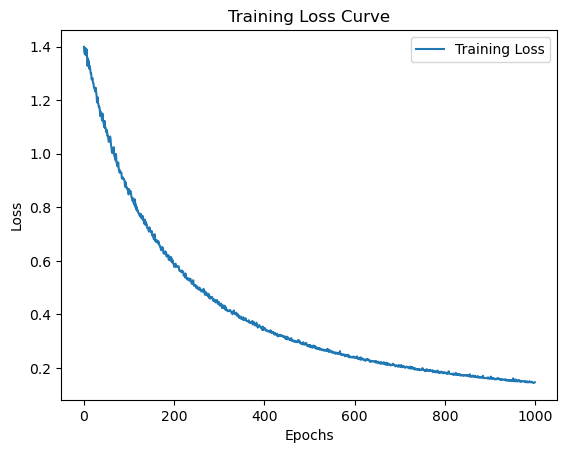

In [5]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[76, 0], [0, 20]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


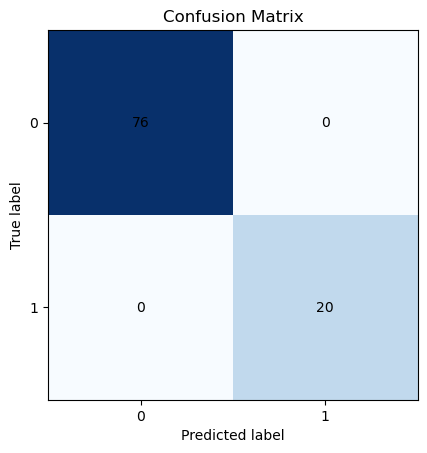

In [6]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

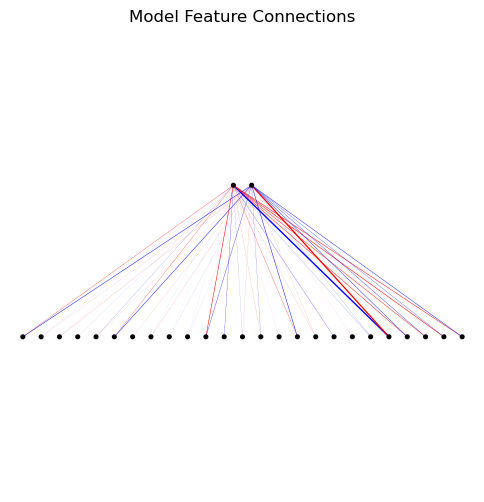

In [7]:
model.plot_connections()

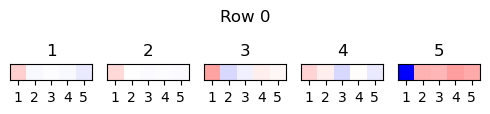

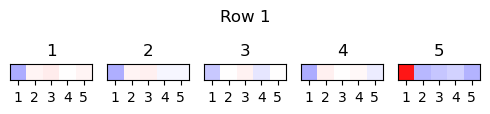

In [8]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)

In [9]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [10]:
import pandas as pd

# Load the original dataset
file_path = f"data/permutations_{n}.csv"
df = pd.read_csv(file_path)

# Apply the rule to compute stat1
df['computed_stat1'] = df['permutation'].apply(lambda x: 1 if x.strip("()").split(", ")[-1] == '1' else 0)

# Check if the rule is 100% correct
accuracy = (df['stat1'] == df['computed_stat1']).mean()

print("The accuracy of Rule = 1 if last element is 1, else 0 is: ", accuracy)

The accuracy of Rule = 1 if last element is 1, else 0 is:  1.0
